In [93]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import pandas as pd
import sys
import os

In [58]:
housing =  fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1,1), random_state=42)
X_train, X_valid, y_train, y_valid =  train_test_split(
    X_train_full, y_train_full, random_state=42)

In [59]:
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [60]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error =  tf.abs(error)<1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

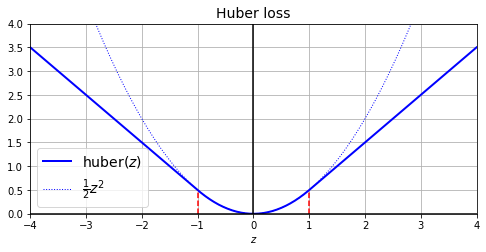

In [61]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [62]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                      input_shape=input_shape),
    keras.layers.Dense(1),
])

In [63]:
model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])

In [66]:
model.fit(X_train_scaled, y_train, epochs=20,
         validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.1752 - mae: 0.4497 - val_loss: 0.1759 - val_mae: 0.4486
Epoch 2/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.1735 - mae: 0.4473 - val_loss: 0.1916 - val_mae: 0.4618
Epoch 3/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.1732 - mae: 0.4462 - val_loss: 0.1733 - val_mae: 0.4431
Epoch 4/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.1725 - mae: 0.4455 - val_loss: 0.1622 - val_mae: 0.4291
Epoch 5/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.1712 - mae: 0.4426 - val_loss: 0.1772 - val_mae: 0.4494
Epoch 6/20
11610/11610 [==============================] - 1s 82us/sample - loss: 0.1700 - mae: 0.4415 - val_loss: 0.1676 - val_mae: 0.4370
Epoch 7/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.1696 - mae: 0.4403 - val_loss: 0.1

In [71]:
model.save('my_model_with_a_custom_loss.h5')

In [72]:
# model = keras.models.load_model('my_model_with_a_custom_loss.h5',
#                                custom_objects={'huber_fn':huber_fn})

In [74]:
model.fit(X_train_scaled, y_train, epochs=20,
         validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.1593 - mae: 0.4236 - val_loss: 0.1500 - val_mae: 0.4094
Epoch 2/20
11610/11610 [==============================] - 1s 84us/sample - loss: 0.1588 - mae: 0.4226 - val_loss: 0.1632 - val_mae: 0.4215
Epoch 3/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.1591 - mae: 0.4233 - val_loss: 0.1705 - val_mae: 0.4328
Epoch 4/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.1587 - mae: 0.4221 - val_loss: 0.1566 - val_mae: 0.4151
Epoch 5/20
11610/11610 [==============================] - 1s 88us/sample - loss: 0.1577 - mae: 0.4203 - val_loss: 0.1556 - val_mae: 0.4163
Epoch 6/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.1572 - mae: 0.4199 - val_loss: 0.1699 - val_mae: 0.4326
Epoch 7/20
11610/11610 [==============================] - 1s 96us/sample - loss: 0.1571 - mae: 0.4193 - val_loss: 0.

In [94]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 /2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [95]:
model.compile(loss= create_huber(2.0), optimizer='nadam', metrices=['mas'])

In [96]:
model.fit(X_train_scaled, y_train, epochs=20,
         validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 171us/sample - loss: 0.1623 - val_loss: 0.1677
Epoch 2/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.1614 - val_loss: 0.1938
Epoch 3/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.1612 - val_loss: 0.1599
Epoch 4/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.1609 - val_loss: 0.1987
Epoch 5/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.1609 - val_loss: 0.1674
Epoch 6/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.1612 - val_loss: 0.1742
Epoch 7/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.1598 - val_loss: 0.1888
Epoch 8/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.1612 - val_loss: 0.1577
Epoch 9/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.1600 - val_

In [99]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [101]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                      input_shape=input_shape),
    keras.layers.Dense(1),
])

In [103]:
model.compile(loss=HuberLoss(2.), optimizer='nadam',metrics=['mae'])

In [104]:
model.fit(X_train_scaled, y_train, epochs=20,
         validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 184us/sample - loss: 0.8524 - mae: 1.0153 - val_loss: 0.2553 - val_mae: 0.5094
Epoch 2/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.2354 - mae: 0.5034 - val_loss: 0.2301 - val_mae: 0.4807
Epoch 3/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.2246 - mae: 0.4933 - val_loss: 0.2090 - val_mae: 0.4680
Epoch 4/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.2200 - mae: 0.4871 - val_loss: 0.2053 - val_mae: 0.4676
Epoch 5/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.2161 - mae: 0.4834 - val_loss: 0.2357 - val_mae: 0.4806
Epoch 6/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.2134 - mae: 0.4791 - val_loss: 0.2058 - val_mae: 0.4672
Epoch 7/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.2102 - mae: 0.4760 - val_loss: 0.